# ARM Team Project — Exploratory Data Analysis (EDA) — Basel-Land (2019)

## Goal of this notebook
This notebook performs non-graphical and graphical exploratory data analysis (EDA) on a cross-sectional municipality dataset for the year **2019**.

**Target variable (Y):**
- Average Rent CHF per m2

**Predictors (X):**
- Tax Rate Natural Persons %
- Foreigners Share %
- Average Household Size
- Income per Taxpayer CHF

**Dataset:**
- Complete-case dataset exported from the data preparation notebook:
  `eda_dataset_2019_complete.csv`


## Libraries and settings

In [1]:
import os
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: f"{x:,.4f}")

sns.set(color_codes=True)

print("Working directory:", os.getcwd())


Working directory: /workspaces/ARM_Gruppe-5/03 - EDA


## Load dataset

We load the complete-case cross-sectional dataset for 2019:
`eda_dataset_2019_complete.csv`
## Import data

In [2]:
DATA_PATH = "/workspaces/ARM_Gruppe-5/03 - EDA/Data/eda_dataset_2019_complete.csv"

df = pd.read_csv(DATA_PATH, sep=",", encoding="utf-8")

print("Loaded df with shape:", df.shape)
df.head()


Loaded df with shape: (58, 8)


,Year,BFS ID,Municipality,Average Rent CHF per m2,Tax Rate Natural Persons %,Foreigners Share %,Average Household Size,Income per Taxpayer CHF
0,2019,2762,Allschwil,"1,386.3910",58.0000,27.5400,2.0900,"69,297.6802"
1,2019,2841,Anwil,"1,273.5419",63.0000,6.0600,2.4400,"55,915.9676"
2,2019,2881,Arboldswil,"1,297.8560",60.0000,6.4100,2.4100,"71,971.1369"
3,2019,2821,Arisdorf,"1,492.7620",59.0000,11.5100,2.4200,"70,530.9441"
4,2019,2763,Arlesheim,"1,483.1575",45.0000,20.0400,2.1300,"87,560.1473"


## Quick dataset inspection

Goal:
- Confirm the dataset structure (rows, columns)
- Check column names and data types
- Ensure variables look plausible for EDA


In [3]:
print("Shape:", df.shape)

print("\nColumns:")
print(list(df.columns))

print("\nInfo:")
df.info()

df.head()


Shape: (58, 8)

Columns:
['Year', 'BFS ID', 'Municipality', 'Average Rent CHF per m2', 'Tax Rate Natural Persons %', 'Foreigners Share %', 'Average Household Size', 'Income per Taxpayer CHF']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        58 non-null     int64  
 1   BFS ID                      58 non-null     int64  
 2   Municipality                58 non-null     object 
 3   Average Rent CHF per m2     58 non-null     float64
 4   Tax Rate Natural Persons %  58 non-null     float64
 5   Foreigners Share %          58 non-null     float64
 6   Average Household Size      58 non-null     float64
 7   Income per Taxpayer CHF     58 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 3.8+ KB


,Year,BFS ID,Municipality,Average Rent CHF per m2,Tax Rate Natural Persons %,Foreigners Share %,Average Household Size,Income per Taxpayer CHF
0,2019,2762,Allschwil,"1,386.3910",58.0000,27.5400,2.0900,"69,297.6802"
1,2019,2841,Anwil,"1,273.5419",63.0000,6.0600,2.4400,"55,915.9676"
2,2019,2881,Arboldswil,"1,297.8560",60.0000,6.4100,2.4100,"71,971.1369"
3,2019,2821,Arisdorf,"1,492.7620",59.0000,11.5100,2.4200,"70,530.9441"
4,2019,2763,Arlesheim,"1,483.1575",45.0000,20.0400,2.1300,"87,560.1473"


## Integrity checks (one row per municipality)

Goal:
- Confirm each municipality appears only once (cross-sectional data)
- Confirm BFS ID appears only once


In [4]:
dup_muni = df.duplicated(subset=["Municipality"]).sum()
dup_bfs = df.duplicated(subset=["BFS ID"]).sum()

print("Duplicate Municipality rows:", int(dup_muni))
print("Duplicate BFS ID rows:", int(dup_bfs))

print("\nUnique municipalities:", df["Municipality"].nunique())
print("Unique BFS IDs:", df["BFS ID"].nunique())


Duplicate Municipality rows: 0
Duplicate BFS ID rows: 0

Unique municipalities: 58
Unique BFS IDs: 58


## Missing values check

Goal:
- Confirm that the dataset is complete-case (no missing values)
- If missing values exist, identify which variables are affected


In [5]:
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)

df_missing = pd.DataFrame({
    "MissingCount": missing_counts,
    "MissingPct": missing_pct
})

display(df_missing)

print("\nTotal missing cells:", int(df.isna().sum().sum()))


,MissingCount,MissingPct
Year,0,0.0000
BFS ID,0,0.0000
Municipality,0,0.0000
Average Rent CHF per m2,0,0.0000
Tax Rate Natural Persons %,0,0.0000
Foreigners Share %,0,0.0000
Average Household Size,0,0.0000
Income per Taxpayer CHF,0,0.0000



Total missing cells: 0


# Univariate non-graphical EDA

## Descriptive statistics (overall)

Goal:
- Summarize central tendency and spread for the numeric variables
- Get an overview of rent levels and predictor distributions

Output:
- Summary statistics table (`describe()`)


In [8]:
# Numeric columns for EDA (exclude identifiers)
exclude_numeric = ["Year", "BFS ID"]
num_cols_eda = [c for c in df.select_dtypes(include=[np.number]).columns if c not in exclude_numeric]

print("Numeric EDA columns:", num_cols_eda)
display(df[num_cols_eda].describe().round(4))


Numeric EDA columns: ['Average Rent CHF per m2', 'Tax Rate Natural Persons %', 'Foreigners Share %', 'Average Household Size', 'Income per Taxpayer CHF']


,Average Rent CHF per m2,Tax Rate Natural Persons %,Foreigners Share %,Average Household Size,Income per Taxpayer CHF
count,58.0000,58.0000,58.0000,58.0000,58.0000
mean,"1,368.9158",58.5552,17.1057,2.2836,"65,373.9687"
std,165.2396,5.5339,8.1186,0.1320,"14,307.1603"
min,"1,003.3815",45.0000,6.0600,1.9500,"42,470.3713"
25%,"1,291.8872",56.0000,11.1900,2.1875,"55,637.5213"
50%,"1,344.5417",59.0000,14.8300,2.3000,"62,757.1970"
75%,"1,459.0957",63.0000,22.1425,2.3800,"70,129.0066"
max,"1,857.1357",69.5000,41.7500,2.5100,"118,429.5547"


## Quantiles (overall)

Goal:
- Inspect distributions beyond mean/std using quantiles
- Identify potential tail behavior and outliers

Output:
- Quantile table (5%, 10%, 25%, 50%, 75%, 90%, 95%) for EDA numeric variables


In [11]:
quantiles = [0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]
display(df[num_cols_eda].quantile(quantiles).round(4))


,Average Rent CHF per m2,Tax Rate Natural Persons %,Foreigners Share %,Average Household Size,Income per Taxpayer CHF
0.0500,"1,074.1995",45.8500,6.8620,2.0870,"49,433.2602"
0.1000,"1,213.9941",52.0000,8.7840,2.1070,"51,872.8042"
0.2500,"1,291.8872",56.0000,11.1900,2.1875,"55,637.5213"
0.5000,"1,344.5417",59.0000,14.8300,2.3000,"62,757.1970"
0.7500,"1,459.0957",63.0000,22.1425,2.3800,"70,129.0066"
0.9000,"1,545.3623",64.4400,27.9900,2.4330,"81,219.6369"
0.9500,"1,632.8212",65.1500,30.2805,2.4545,"96,782.9937"


## Skewness and kurtosis

Goal:
- Check skewness (asymmetry) and kurtosis (tail heaviness) across municipalities
- Use this as an EDA diagnostic together with later plots

Output:
- Skewness and kurtosis table for EDA numeric variables


In [12]:
df_shape = pd.DataFrame({
    "Skewness": df[num_cols_eda].skew(),
    "Kurtosis": df[num_cols_eda].kurtosis()
}).round(4)

display(df_shape)


,Skewness,Kurtosis
Average Rent CHF per m2,0.5669,1.5138
Tax Rate Natural Persons %,-0.7758,0.5719
Foreigners Share %,0.7816,-0.0191
Average Household Size,-0.4761,-0.2965
Income per Taxpayer CHF,1.5108,3.1087


## Extreme values (Rent)

Goal:
- Identify the municipalities with the highest and lowest average rent (CHF/m2)

Output:
- Top 10 and bottom 10 municipalities by rent


In [13]:
target = "Average Rent CHF per m2"

df_sorted = df.sort_values(target, ascending=False)

print("Top 10 municipalities by rent:")
display(df_sorted[["Municipality", target]].head(10))

print("\nBottom 10 municipalities by rent:")
display(df_sorted[["Municipality", target]].tail(10))


Top 10 municipalities by rent:


,Municipality,Average Rent CHF per m2
43,Pfeffingen,"1,857.1357"
28,Hersberg,"1,833.8584"
7,Biel-Benken,"1,698.3284"
11,Bottmingen,"1,621.2611"
45,Ramlinsburg,"1,605.2245"
53,Therwil,"1,576.0893"
51,Schönenbuch,"1,532.1935"
57,Wintersingen,"1,521.1219"
31,Känerkinden,"1,520.9485"
22,Ettingen,"1,495.3950"



Bottom 10 municipalities by rent:


,Municipality,Average Rent CHF per m2
42,Nenzlingen,"1,259.2182"
9,Birsfelden,"1,240.3278"
33,Laufen,"1,237.8637"
6,Bennwil,"1,218.8683"
56,Waldenburg,"1,202.6211"
19,Dittingen,"1,148.4646"
32,Langenbruck,"1,077.7950"
39,Läufelfingen,"1,053.8249"
15,Buckten,"1,038.4757"
36,Liesberg,"1,003.3815"


## Top/Bottom 5 municipalities for each variable

Goal:
- For each EDA variable, list:
  - Top 5 municipalities (highest values)
  - Bottom 5 municipalities (lowest values)

Output:
- Small tables for each variable (rent, tax, foreigners, household size, income per taxpayer)


In [14]:
# Variables we want top/bottom lists for (exclude identifiers)
vars_to_rank = [
    "Average Rent CHF per m2",
    "Tax Rate Natural Persons %",
    "Foreigners Share %",
    "Average Household Size",
    "Income per Taxpayer CHF"
]

# Keep only those that exist (safety)
vars_to_rank = [v for v in vars_to_rank if v in df.columns]

for v in vars_to_rank:
    print("\n" + "="*80)
    print(f"Variable: {v}")
    print("="*80)

    # Top 5
    top5 = df.sort_values(v, ascending=False)[["Municipality", "BFS ID", v]].head(5)
    print("\nTop 5 municipalities:")
    display(top5)

    # Bottom 5
    bottom5 = df.sort_values(v, ascending=True)[["Municipality", "BFS ID", v]].head(5)
    print("\nBottom 5 municipalities:")
    display(bottom5)



Variable: Average Rent CHF per m2

Top 5 municipalities:


,Municipality,BFS ID,Average Rent CHF per m2
43,Pfeffingen,2772,"1,857.1357"
28,Hersberg,2827,"1,833.8584"
7,Biel-Benken,2764,"1,698.3284"
11,Bottmingen,2767,"1,621.2611"
45,Ramlinsburg,2832,"1,605.2245"



Bottom 5 municipalities:


,Municipality,BFS ID,Average Rent CHF per m2
36,Liesberg,2788,"1,003.3815"
15,Buckten,2843,"1,038.4757"
39,Läufelfingen,2852,"1,053.8249"
32,Langenbruck,2888,"1,077.7950"
19,Dittingen,2784,"1,148.4646"



Variable: Tax Rate Natural Persons %

Top 5 municipalities:


,Municipality,BFS ID,Tax Rate Natural Persons %
56,Waldenburg,2895,69.5000
27,Grellingen,2786,67.0000
19,Dittingen,2784,66.0000
54,Titterten,2894,65.0000
37,Liestal,2829,65.0000



Bottom 5 municipalities:


,Municipality,BFS ID,Tax Rate Natural Persons %
4,Arlesheim,2763,45.0000
11,Bottmingen,2767,45.0000
43,Pfeffingen,2772,45.0000
7,Biel-Benken,2764,46.0000
8,Binningen,2765,48.0000



Variable: Foreigners Share %

Top 5 municipalities:


,Municipality,BFS ID,Foreigners Share %
44,Pratteln,2831,41.7500
23,Frenkendorf,2824,32.5700
9,Birsfelden,2766,30.6800
56,Waldenburg,2895,30.2100
24,Füllinsdorf,2825,29.4900



Bottom 5 municipalities:


,Municipality,BFS ID,Foreigners Share %
1,Anwil,2841,6.0600
2,Arboldswil,2881,6.4100
12,Bretzwil,2883,6.5900
6,Bennwil,2882,6.9100
52,Seltisberg,2833,7.6900



Variable: Average Household Size

Top 5 municipalities:


,Municipality,BFS ID,Average Household Size
6,Bennwil,2882,2.5100
50,Rümlingen,2859,2.5100
12,Bretzwil,2883,2.4800
13,Brislach,2782,2.4500
43,Pfeffingen,2772,2.4400



Bottom 5 municipalities:


,Municipality,BFS ID,Average Household Size
5,Augst,2822,1.9500
9,Birsfelden,2766,1.9600
36,Liesberg,2788,2.0700
0,Allschwil,2762,2.0900
32,Langenbruck,2888,2.1000



Variable: Income per Taxpayer CHF

Top 5 municipalities:


,Municipality,BFS ID,Income per Taxpayer CHF
11,Bottmingen,2767,"118,429.5547"
43,Pfeffingen,2772,"102,874.2041"
8,Binningen,2765,"99,143.8997"
7,Biel-Benken,2764,"96,366.3632"
4,Arlesheim,2763,"87,560.1473"



Bottom 5 municipalities:


,Municipality,BFS ID,Income per Taxpayer CHF
47,Roggenburg,2790,"42,470.3713"
32,Langenbruck,2888,"43,906.5727"
35,Lauwil,2889,"48,831.0566"
56,Waldenburg,2895,"49,539.5315"
36,Liesberg,2788,"50,890.1741"


# Multivariate non-graphical EDA

## Correlation and covariance matrices (EDA numeric variables)

Goal:
- Quantify linear relationships between rent and predictors (correlation)
- Inspect covariance as the unstandardized version (units matter)

Output:
- Correlation matrix table (EDA numeric variables only)
- Covariance matrix table (EDA numeric variables only)


In [15]:
corr = df[num_cols_eda].corr().round(4)
cov = df[num_cols_eda].cov().round(4)

print("Correlation matrix (EDA numeric variables):")
display(corr)

print("\nCovariance matrix (EDA numeric variables):")
display(cov)


Correlation matrix (EDA numeric variables):


,Average Rent CHF per m2,Tax Rate Natural Persons %,Foreigners Share %,Average Household Size,Income per Taxpayer CHF
Average Rent CHF per m2,1.0000,-0.5874,-0.0906,0.2534,0.6871
Tax Rate Natural Persons %,-0.5874,1.0000,-0.0575,-0.0022,-0.7629
Foreigners Share %,-0.0906,-0.0575,1.0000,-0.5619,0.0597
Average Household Size,0.2534,-0.0022,-0.5619,1.0000,0.1069
Income per Taxpayer CHF,0.6871,-0.7629,0.0597,0.1069,1.0000



Covariance matrix (EDA numeric variables):


,Average Rent CHF per m2,Tax Rate Natural Persons %,Foreigners Share %,Average Household Size,Income per Taxpayer CHF
Average Rent CHF per m2,"27,304.1146",-537.1378,-121.5617,5.5275,"1,624,333.7809"
Tax Rate Natural Persons %,-537.1378,30.6239,-2.5852,-0.0016,"-60,404.8019"
Foreigners Share %,-121.5617,-2.5852,65.9114,-0.6022,"6,938.5467"
Average Household Size,5.5275,-0.0016,-0.6022,0.0174,201.8660
Income per Taxpayer CHF,"1,624,333.7809","-60,404.8019","6,938.5467",201.8660,"204,694,836.7321"


## Univariate graphical EDA: Histogram (Average Rent CHF per m2)

Goal:
- Visualize the distribution of the target variable across municipalities
- Check spread, skewness, and whether there are extreme values

Output:
- Histogram of Average Rent CHF per m2


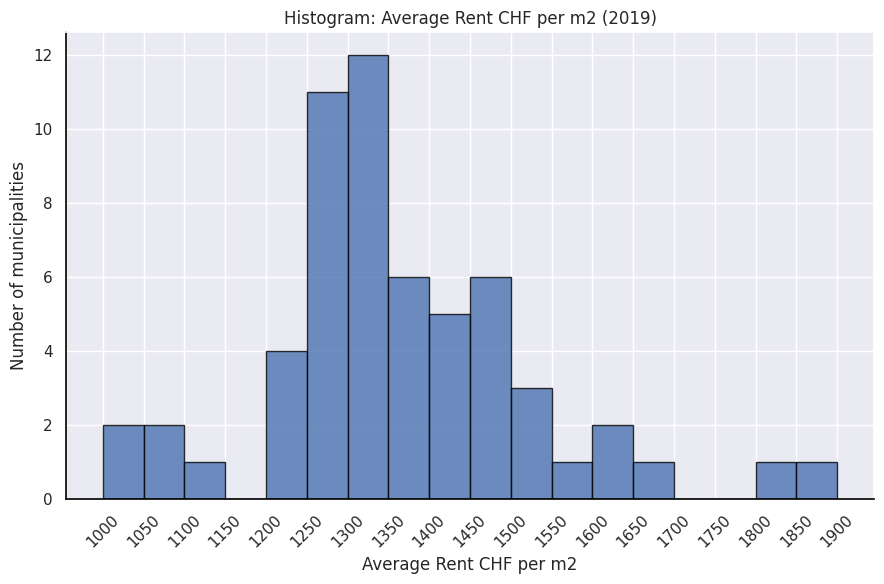

In [32]:
target = "Average Rent CHF per m2"

x = df[target].dropna().values

# Define clean bin edges (50 CHF steps)
bin_width = 50
x_min = np.floor(x.min() / bin_width) * bin_width
x_max = np.ceil(x.max() / bin_width) * bin_width
bins = np.arange(x_min, x_max + bin_width, bin_width)

plt.figure(figsize=(9,6))
plt.hist(x, bins=bins, edgecolor="black", linewidth=1, alpha=0.8)

plt.title("Histogram: Average Rent CHF per m2 (2019)")
plt.xlabel("Average Rent CHF per m2")
plt.ylabel("Number of municipalities")

# Clean ticks: show every bin edge (or every 2nd if too crowded)
plt.xticks(bins, rotation=45)

# Make axes lines clearly visible
ax = plt.gca()
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["bottom"].set_linewidth(1.2)
ax.spines["left"].set_linewidth(1.2)

plt.tight_layout()
plt.show()


## Univariate graphical EDA: Boxplot (Average Rent CHF per m2)

Goal:
- Detect outliers and visualize spread using median and IQR


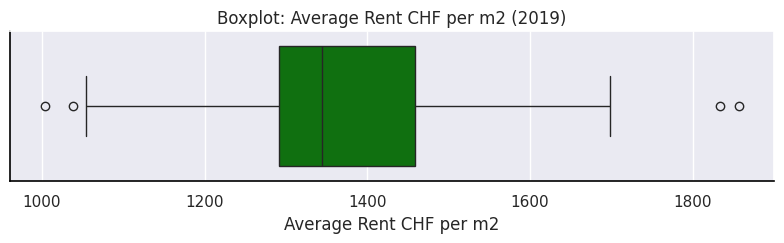

In [35]:
target = "Average Rent CHF per m2"

plt.figure(figsize=(8,2.6))
sns.boxplot(x=df[target], color="green", linewidth=1)

plt.title("Boxplot: Average Rent CHF per m2 (2019)")
plt.xlabel("Average Rent CHF per m2")

ax = plt.gca()
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["bottom"].set_linewidth(1.2)
ax.spines["left"].set_linewidth(1.2)

plt.tight_layout()
plt.show()


## Univariate graphical EDA: Density plot (Average Rent CHF per m2)

Goal:
- Show a smooth distribution curve (shape, skewness, possible multiple peaks)


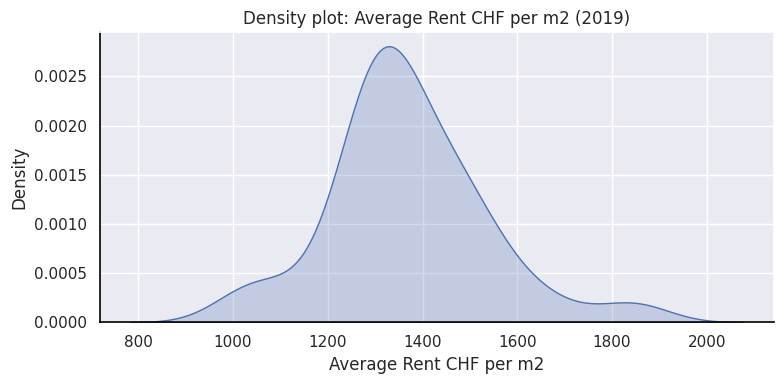

In [36]:
target = "Average Rent CHF per m2"

plt.figure(figsize=(8,4))
sns.kdeplot(df[target].dropna(), fill=True)

plt.title("Density plot: Average Rent CHF per m2 (2019)")
plt.xlabel("Average Rent CHF per m2")
plt.ylabel("Density")

ax = plt.gca()
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["bottom"].set_linewidth(1.2)
ax.spines["left"].set_linewidth(1.2)

plt.tight_layout()
plt.show()
